In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [6]:
train_data = pd.read_excel("Data_Train.xlsx")

In [7]:
pd.set_option('display.max_columns',None)

In [8]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [10]:
train_data.dropna(inplace=True)

In [11]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

    # EDA

In [12]:
#convert object data into date-time

In [13]:
train_data["journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [14]:
train_data["journey_month"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.month

In [15]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [16]:
train_data.drop(["Date_of_Journey"], inplace=True,axis=1)

In [17]:
#for departure time
train_data["Dep_hour"] = pd.to_datetime(train_data.Dep_Time).dt.hour
train_data["Dep_min"] = pd.to_datetime(train_data.Dep_Time).dt.minute

train_data.drop(["Dep_Time"], inplace=True,axis=1)

In [18]:
train_data.head(5)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [19]:
#for Arrival time
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

train_data.drop(["Arrival_Time"], inplace=True,axis=1)

In [20]:
train_data.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [21]:
#for duration 

duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2: #check if its only contain hour or min
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m" #add o min
        else:
            duration[i] = "0h " +duration[i]  # add 0 hour
            
            
duration_hours = []
duration_mins = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0])) #extract hour
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) #extract min

In [22]:
train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [23]:
train_data.drop(["Duration"],axis=1,inplace = True)

In [24]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [25]:
#Data Encoding 

train_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

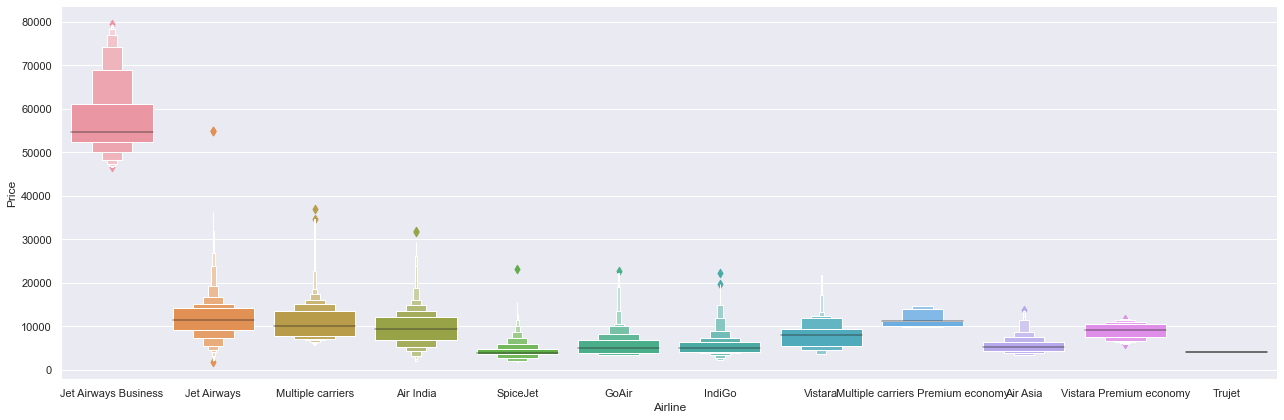

In [26]:
sns.catplot(y="Price", x= "Airline", data=train_data.sort_values("Price",ascending = False), kind="boxen",height=6,aspect=3)

plt.show()

In [27]:
Airline = train_data["Airline"]

Airline = pd.get_dummies(Airline, drop_first = True)

Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [28]:
train_data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

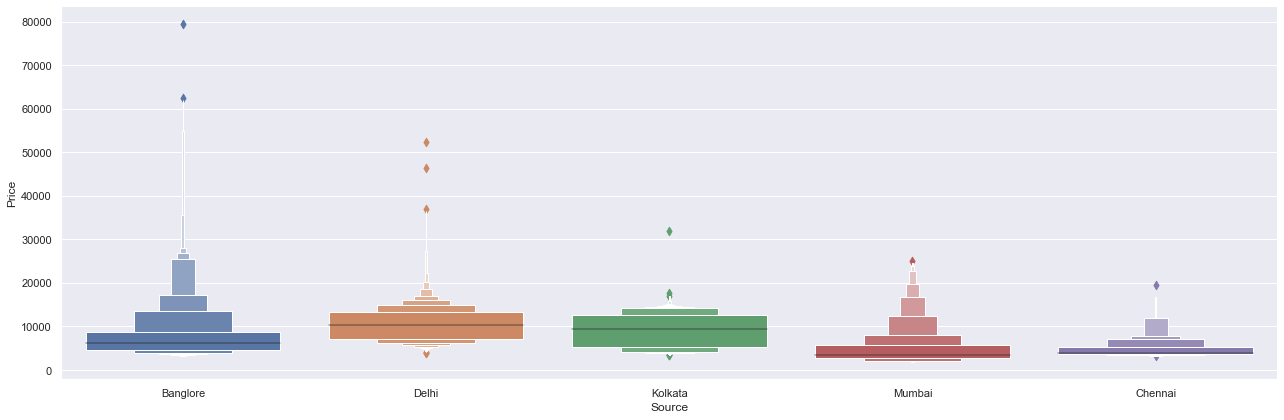

In [29]:
sns.catplot(y="Price", x= "Source", data=train_data.sort_values("Price",ascending = False), kind="boxen",height=6,aspect=3)

plt.show()

In [30]:
Source = train_data["Source"]

Source = pd.get_dummies(Source, drop_first = True)

Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [31]:
train_data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [32]:
Destination = train_data["Destination"]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [33]:
train_data["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [34]:
train_data.drop(["Route","Additional_Info"],axis=1,inplace=True)

In [35]:
train_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [36]:
train_data.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

In [37]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [38]:
data_train = pd.concat([train_data,Airline, Source, Destination],axis= 1)

In [39]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [40]:
data_train.drop(["Airline","Source","Destination"],axis=1,inplace=True)

In [41]:
data_train.head()

,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [42]:
data_train.shape

(10682, 30)

# for test set

In [43]:
test_data = pd.read_excel("Test_set.xlsx")

In [44]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [45]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)


Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

# Feature Selection

In [46]:
data_train.shape


(10682, 30)

In [47]:
data_train.columns


Index(['Total_Stops', 'Price', 'journey_day', 'journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

In [48]:
data_train.head()

,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [49]:
X = data_train.drop(["Price"],axis=1)

In [50]:
X.shape

(10682, 29)

In [51]:
X.head()

,Total_Stops,journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [52]:
y = data_train.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [53]:
y.shape

(10682,)

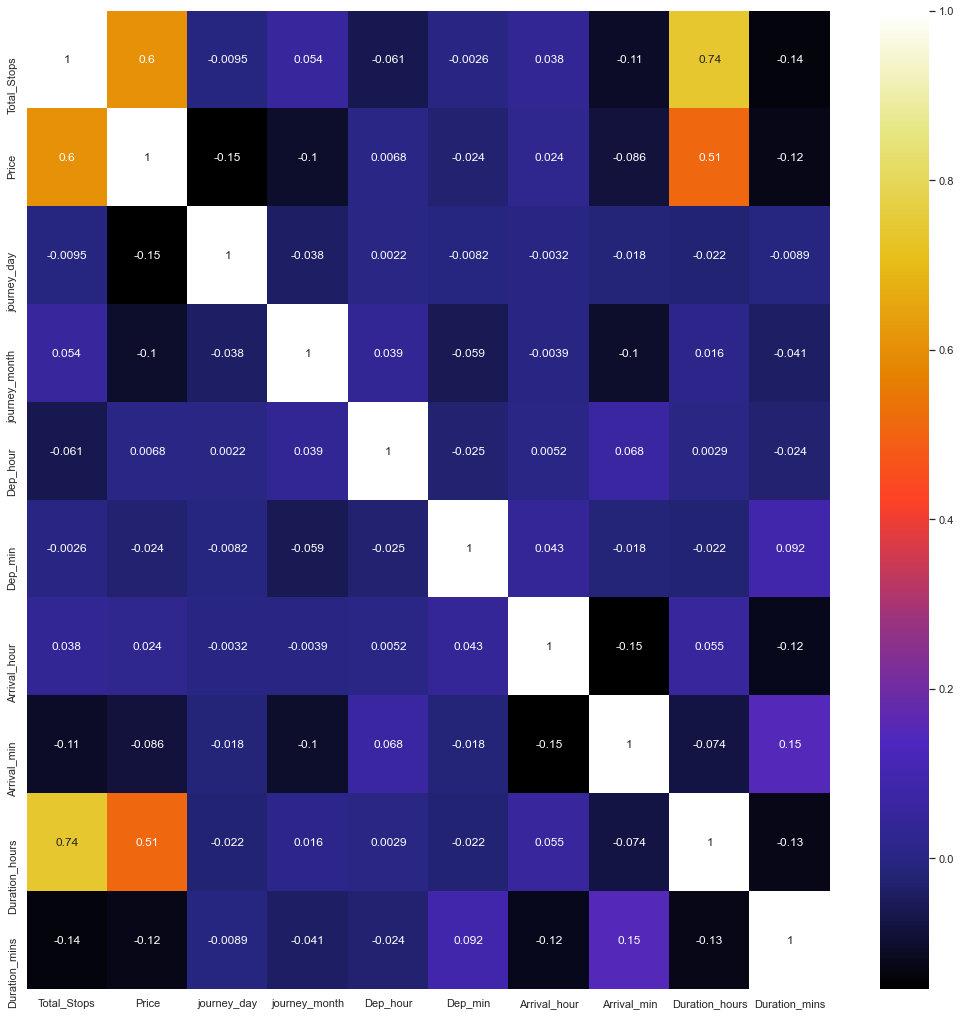

In [54]:
plt.figure(figsize=(18,18))
sns.heatmap(train_data.corr(), annot=True, cmap="CMRmap")

plt.show()

In [55]:
# feature extraction

In [56]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()

In [57]:
selection.fit(X,y)

ExtraTreesRegressor()

In [58]:
print(selection.feature_importances_)

[2.46701954e-01 1.44691680e-01 5.26038933e-02 2.41625272e-02
 2.12718509e-02 2.80230256e-02 1.95259354e-02 1.03918540e-01
 1.75648134e-02 1.05971661e-02 1.87354011e-03 1.92615844e-02
 1.39747659e-01 6.66854128e-02 1.76376022e-02 8.56322148e-04
 3.39864116e-03 1.05491739e-04 5.21816206e-03 7.24344516e-05
 4.51044584e-04 9.77556308e-03 3.12249800e-03 5.73773532e-03
 1.26913952e-02 1.28857257e-02 6.14554403e-03 4.30612139e-04
 2.48416461e-02]


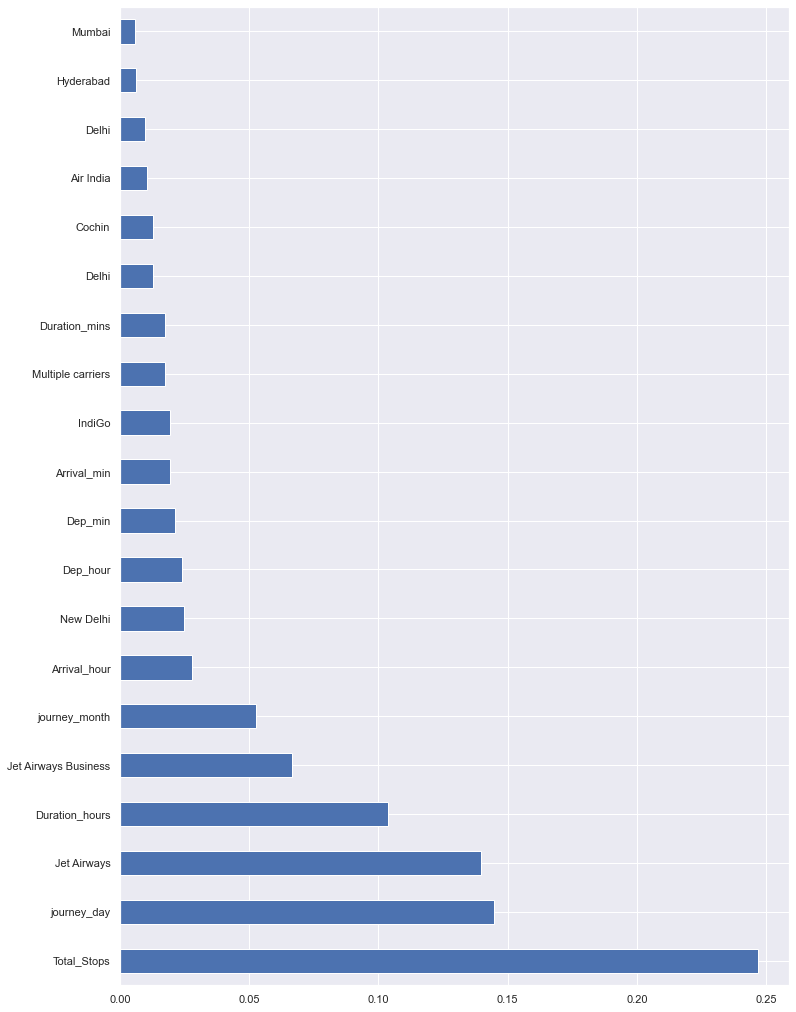

In [59]:
plt.figure(figsize=(12,18))
feat_importance = pd.Series(selection.feature_importances_,index=X.columns)
feat_importance.nlargest(20).plot(kind='barh')
plt.show()

In [60]:
#fit model

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [62]:
from sklearn.ensemble import RandomForestRegressor

reg_rf = RandomForestRegressor()
reg_rf.fit(X_train,y_train)

RandomForestRegressor()

In [63]:
y_pred = reg_rf.predict(X_test)

In [64]:
reg_rf.score(X_train,y_train)

0.9531989782886734

In [65]:
reg_rf.score(X_test,y_test)

0.7978115177397518

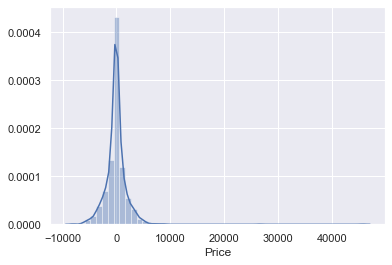

In [66]:
sns.distplot(y_test-y_pred)
plt.show()

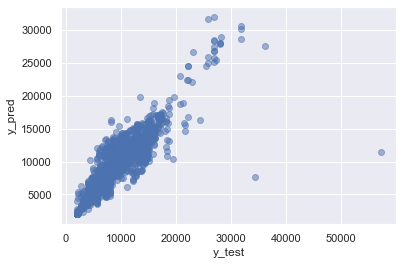

In [67]:
plt.scatter(y_test,y_pred,alpha=0.5)

plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [68]:
from sklearn import metrics

In [69]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1173.7100007782215
MSE: 4359599.442592258
RMSE: 2087.9653834755636


In [70]:
metrics.r2_score(y_test, y_pred)


0.7978115177397518

In [71]:
#hyperparameter tuning

In [72]:
#Randomized Search CV
"""
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-72-869892cf8581>, line 7)

In [ ]:
"""
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [ ]:
""""
from sklearn.model_selection import RandomizedSearchCV

rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
""""
rf_random.fit(X_train,y_train)


In [ ]:
""""
rf_random.best_params_


In [ ]:
""""
prediction = rf_random.predict(X_test)


In [ ]:
""""
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

In [ ]:
"""
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [ ]:
"""
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

In [ ]:
#save model


In [ ]:
"""
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)
""""

In [2]:
import pickle

model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [3]:
y_prediction = forest.predict(X_test)


NameError: name 'X_test' is not defined

In [75]:
metrics.r2_score(y_test, y_prediction)


0.797373109142557

In [ ]:
###################################33

In [79]:
#######################################
X_train.dtypes

Total_Stops                          int64
journey_day                          int64
journey_month                        int64
Dep_hour                             int64
Dep_min                              int64
Arrival_hour                         int64
Arrival_min                          int64
Duration_hours                       int64
Duration_mins                        int64
Air India                            uint8
GoAir                                uint8
IndiGo                               uint8
Jet Airways                          uint8
Jet Airways Business                 uint8
Multiple carriers                    uint8
Multiple carriers Premium economy    uint8
SpiceJet                             uint8
Trujet                               uint8
Vistara                              uint8
Vistara Premium economy              uint8
Chennai                              uint8
Delhi                                uint8
Kolkata                              uint8
Mumbai     

In [108]:
Journey_day = int(input("day:"))

Journey_month = int(input("month:"))

# Departure
Dep_hour = int(input("Dep_hour:"))

Dep_min = int(input("Dep_min:"))

# print("Departure : ",Dep_hour, Dep_min)

# Arrival
Arrival_hour = int(input("Arrival_hour:"))

Arrival_min = int(input("Arrival_min:"))
print("Arrival : ",Arrival_hour, Arrival_min)


# Duration
dur_hour = abs(Arrival_hour - Dep_hour)
dur_min = abs(Arrival_min - Dep_min)
print("Duration : ", dur_hour, dur_min)

# Total Stops
Total_stops = int(input("stops:"))
print(Total_stops)

 # Airline
        # AIR ASIA = 0 (not in column)
airline=input("name:")
if(airline=='Jet Airways'):
    Jet_Airways = 1
    IndiGo = 0
    Air_India = 0
    Multiple_carriers = 0
    SpiceJet = 0
    Vistara = 0
    GoAir = 0
    Multiple_carriers_Premium_economy = 0
    Jet_Airways_Business = 0
    Vistara_Premium_economy = 0
    Trujet = 0 
elif (airline=='IndiGo'):
    Jet_Airways = 0
    IndiGo = 1
    Air_India = 0
    Multiple_carriers = 0
    SpiceJet = 0
    Vistara = 0
    GoAir = 0
    Multiple_carriers_Premium_economy = 0
    Jet_Airways_Business = 0
    Vistara_Premium_economy = 0
    Trujet = 0 

elif (airline=='Air India'):
    Jet_Airways = 0
    IndiGo = 0
    Air_India = 1
    Multiple_carriers = 0
    SpiceJet = 0
    Vistara = 0
    GoAir = 0
    Multiple_carriers_Premium_economy = 0
    Jet_Airways_Business = 0
    Vistara_Premium_economy = 0
    Trujet = 0 
    
elif (airline=='Multiple carriers'):
    Jet_Airways = 0
    IndiGo = 0
    Air_India = 0
    Multiple_carriers = 1
    SpiceJet = 0
    Vistara = 0
    GoAir = 0
    Multiple_carriers_Premium_economy = 0
    Jet_Airways_Business = 0
    Vistara_Premium_economy = 0
    Trujet = 0 
            
elif (airline=='SpiceJet'):
    Jet_Airways = 0
    IndiGo = 0
    Air_India = 0
    Multiple_carriers = 0
    SpiceJet = 1
    Vistara = 0
    GoAir = 0
    Multiple_carriers_Premium_economy = 0
    Jet_Airways_Business = 0
    Vistara_Premium_economy = 0
    Trujet = 0 
            
elif (airline=='Vistara'):
    Jet_Airways = 0
    IndiGo = 0
    Air_India = 0
    Multiple_carriers = 0
    SpiceJet = 0
    Vistara = 1
    GoAir = 0
    Multiple_carriers_Premium_economy = 0
    Jet_Airways_Business = 0
    Vistara_Premium_economy = 0
    Trujet = 0

elif (airline=='GoAir'):
    Jet_Airways = 0
    IndiGo = 0
    Air_India = 0
    Multiple_carriers = 0
    SpiceJet = 0
    Vistara = 0
    GoAir = 1
    Multiple_carriers_Premium_economy = 0
    Jet_Airways_Business = 0
    Vistara_Premium_economy = 0
    Trujet = 0

elif (airline=='Multiple carriers Premium economy'):
    Jet_Airways = 0
    IndiGo = 0
    Air_India = 0
    Multiple_carriers = 0
    SpiceJet = 0
    Vistara = 0
    GoAir = 0
    Multiple_carriers_Premium_economy = 1
    Jet_Airways_Business = 0
    Vistara_Premium_economy = 0
    Trujet = 0

elif (airline=='Jet Airways Business'):
    Jet_Airways = 0
    IndiGo = 0
    Air_India = 0
    Multiple_carriers = 0
    SpiceJet = 0
    Vistara = 0
    GoAir = 0
    Multiple_carriers_Premium_economy = 0
    Jet_Airways_Business = 1
    Vistara_Premium_economy = 0
    Trujet = 0

elif (airline=='Vistara Premium economy'):
    Jet_Airways = 0
    IndiGo = 0
    Air_India = 0
    Multiple_carriers = 0
    SpiceJet = 0
    Vistara = 0
    GoAir = 0
    Multiple_carriers_Premium_economy = 0
    Jet_Airways_Business = 0
    Vistara_Premium_economy = 1
    Trujet = 0
            
elif (airline=='Trujet'):
    Jet_Airways = 0
    IndiGo = 0
    Air_India = 0
    Multiple_carriers = 0
    SpiceJet = 0
    Vistara = 0
    GoAir = 0
    Multiple_carriers_Premium_economy = 0
    Jet_Airways_Business = 0
    Vistara_Premium_economy = 0
    Trujet = 1

else:
    Jet_Airways = 0
    IndiGo = 0
    Air_India = 0
    Multiple_carriers = 0
    SpiceJet = 0
    Vistara = 0
    GoAir = 0
    Multiple_carriers_Premium_economy = 0
    Jet_Airways_Business = 0
    Vistara_Premium_economy = 0
    Trujet = 0

print(Jet_Airways,IndiGo,Air_India,Multiple_carriers,SpiceJet,Vistara,GoAir,Multiple_carriers_Premium_economy,Jet_Airways_Business,Vistara_Premium_economy,Trujet)





        # Source
        # Banglore = 0 (not in column)
Source = input("Source:")
if (Source == 'Delhi'):
    s_Delhi = 1
    s_Kolkata = 0
    s_Mumbai = 0
    s_Chennai = 0

elif (Source == 'Kolkata'):
    s_Delhi = 0
    s_Kolkata = 1
    s_Mumbai = 0
    s_Chennai = 0

elif (Source == 'Mumbai'):
    s_Delhi = 0
    s_Kolkata = 0
    s_Mumbai = 1
    s_Chennai = 0

elif (Source == 'Chennai'):
    s_Delhi = 0
    s_Kolkata = 0
    s_Mumbai = 0
    s_Chennai = 1

else:
            s_Delhi = 0
            s_Kolkata = 0
            s_Mumbai = 0
            s_Chennai = 0

print(s_Delhi,
            s_Kolkata,
            s_Mumbai,
            s_Chennai)

        # Destination
        # Banglore = 0 (not in column)
Source = input("Destination:")
if (Source == 'Cochin'):
    d_Cochin = 1
    d_Delhi = 0
    d_New_Delhi = 0
    d_Hyderabad = 0
    d_Kolkata = 0

elif (Source == 'Delhi'):
    d_Cochin = 0
    d_Delhi = 1
    d_New_Delhi = 0
    d_Hyderabad = 0
    d_Kolkata = 0

elif (Source == 'New_Delhi'):
    d_Cochin = 0
    d_Delhi = 0
    d_New_Delhi = 1
    d_Hyderabad = 0
    d_Kolkata = 0

elif (Source == 'Hyderabad'):
    d_Cochin = 0
    d_Delhi = 0
    d_New_Delhi = 0
    d_Hyderabad = 1
    d_Kolkata = 0

elif (Source == 'Kolkata'):
    d_Cochin = 0
    d_Delhi = 0
    d_New_Delhi = 0
    d_Hyderabad = 0
    d_Kolkata = 1

else:
    d_Cochin = 0
    d_Delhi = 0
    d_New_Delhi = 0
    d_Hyderabad = 0
    d_Kolkata = 0
               
               
print(
    d_Cochin,
    d_Delhi,
    d_New_Delhi,
    d_Hyderabad,
    d_Kolkata
)


print(""#" * 75)
print("Journey Date : ",Journey_day, Journey_month)
print("Departure : ",Dep_hour, Dep_min)
print("Departure : ",Dep_hour, Dep_min)
print("Departure : ",Dep_hour, Dep_min)


Destination:Delhi
0 1 0 0 0


In [109]:
prediction=forest.predict([[
            Total_stops,
            Journey_day,
            Journey_month,
            Dep_hour,
            Dep_min,
            Arrival_hour,
            Arrival_min,
            dur_hour,
            dur_min,
            Air_India,
            GoAir,
            IndiGo,
            Jet_Airways,
            Jet_Airways_Business,
            Multiple_carriers,
            Multiple_carriers_Premium_economy,
            SpiceJet,
            Trujet,
            Vistara,
            Vistara_Premium_economy,
            s_Chennai,
            s_Delhi,
            s_Kolkata,
            s_Mumbai,
            d_Cochin,
            d_Delhi,
            d_Hyderabad,
            d_Kolkata,
            d_New_Delhi
        ]])

output=round(prediction[0],2)

In [110]:
output

10245.55